# ASAD model, positive supply shock

## 1. Model Description

1. **IS:** $$ y_{t} - \bar{y} = \alpha_{1} (g_{t} - \bar{g}) - \alpha_{2} (r_{t} - \bar{r}) - \alpha_{3} (\tau_{t} - \bar{\tau}) + v_{t} $$

2. **Real interest rate:** $$ r_{t} \equiv i_{t} - \pi^e_{t+1} $$

3. **Nominal interest rate:** $$ i_{t} = \bar{r} + \pi^e + h (y_{t} - \bar{y}) + b (\pi_{t} - \pi^{*}) + \hat{\rho}_{t} $$

4. **Phillips curve:** $$ \pi_{t} = \pi^e_t + \gamma (y_{t} - \bar{y}) + s_{t} $$

5. **Expectations formation:** $$ \pi^e_t = \pi_{t-1} $$

Which (with some math) can be derived as

6. **AD-curve:** $$y_{t}-\bar{y} = -a (\pi^{\ast}-\pi_t) + z \Leftrightarrow \pi_t = \frac{1}{a}(y_{t} - \bar{y} - a\pi^{\ast} + z) $$

7.  **AS curve:** $$\pi_t = \pi_{t-1} + \gamma (y-\bar{y}) + s_t$$

where
$$a \equiv \frac{\alpha_2 h}{1 + \alpha_2b}, \quad z_t \equiv \frac{\alpha_1(g_t - \bar{g}) + \alpha_3(\tau - \bar{\tau}) + v_t - \alpha_2\hat{\rho}_t}{1 + \alpha_2b}$$




Define the **output and inflation gaps**:


8. **Output:** $$\hat{y}_{t} = -\bar{y}$$
9. **Inflation:** $$\hat{\pi}_{t} = \pi-\pi^{\ast}$$

The model's shock parameters $v_t$, $\hat{\rho}_t$, and $s_t$ are all initially set to zero. The model's other parameters are strictly positive. Note that by a positive supply shock, we understand a decrease in $s_t$

Imports and set magics:

In [2]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local moduless
import modelproject

### 1: A positive supply shock

Initially the economy is in equilibrium. We analyze the effects of a positive supply shock hitting the economy in period 1 and disappearing in period 2.
We want to illustrate the effects in the short and long run using a $y-\pi$ diagram. Then provide some intuition.

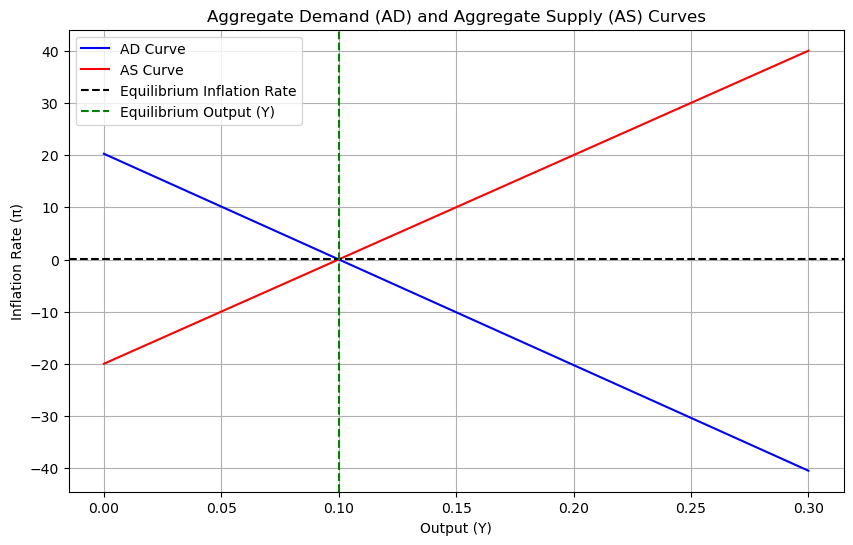

In [3]:
# Parameters
ar = 0.02
y_bar = 0.1
gamma = 200  # Positive slope
alpha_1 = 0.025
alpha_2 = 0.025
alpha_3 = 0.025
h = 0.2
b = 0.5
g_bar = 0.2
tau_bar = 0.2
tau = 0.2
g_t = 0.2
v_t = 0
rho_t = 0
s_t = 0
pi = 0.02
pi_1 = 0.02

# Function to calculate z_t
def calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t):
    a = (alpha_2 * h) / (1 + alpha_2 * b)
    z_t = (alpha_1 * (g_t - g_bar) + alpha_3 * (tau - tau_bar) + v_t - alpha_2 * rho_t) / (1 + alpha_2 * b)
    return z_t

# Function to calculate a
def a(alpha_2, h, b):
    a = (alpha_2 * h) / (1 + alpha_2 * b)
    return a

# calculate z_t
z_t = calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t)

# Define AD and AS curves
def ad_curve(y, y_bar, alpha, pi_star, pi, z_t):
    pi = - 1 / a(alpha_2, h, b) * (y - y_bar - z_t) + pi_star
    return pi

def as_curve(pi, pi_1, gamma, y, y_bar, s_t):
    pi = pi_1 + gamma * (y - y_bar) + s_t
    return pi

# Range of output values
output_range = np.linspace(0, 0.3, 100)

# Calculate AD and AS curves
ad_values = ad_curve(output_range, y_bar, alpha_2, pi, pi, z_t)
as_values = as_curve(pi, pi_1, gamma, output_range, y_bar, s_t)

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, ad_values, label='AD Curve', color='blue')
plt.plot(output_range, as_values, label='AS Curve', color='red')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('Aggregate Demand (AD) and Aggregate Supply (AS) Curves')
plt.axhline(y=pi, color='black', linestyle='--', label='Equilibrium Inflation Rate')
plt.axvline(x=output_range[np.argmin(np.abs(ad_values - as_values))], color='green', linestyle='--', label='Equilibrium Output (Y)')
plt.legend()
plt.grid(True)
plt.show()


Above, we see that the economy initially finds itself in the long-run equilibrium, where $ y = \bar{y} $ and $ \pi = \pi^* $. Then comes the positive supply shock


Analyze the effects of a positive supply shock hitting the economy in period 1 and disappearing in period 2.
We want to illustrate the effects in the short and long run using a $y-\pi$ diagram. Then provide some intuition.

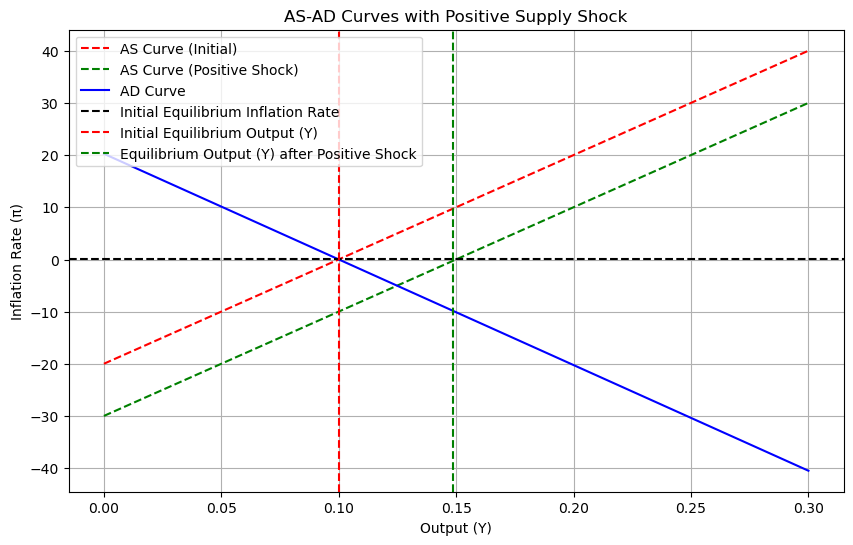

In [4]:
from ipywidgets import interactive

output_range = np.linspace(0, 0.3, 100)

s_t_initial = 0
s_t_new = -10

# AD curve in equilibrium
ad_values_initial = ad_curve(output_range, y_bar, alpha_2, pi, pi, z_t)

# Calculate AS curve with initial supply shock
as_values_initial = pi_1 + gamma * (output_range - y_bar) + s_t_initial

# Calculate AS curve with positive supply shock
as_values_positive = pi_1 + gamma * (output_range - y_bar) + s_t_new

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, as_values_initial, label='AS Curve (Initial)', color='red', linestyle='--')
plt.plot(output_range, as_values_positive, label='AS Curve (Positive Shock)', color='green', linestyle='--')
plt.plot(output_range, ad_values_initial, label='AD Curve', color='blue')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('AS-AD Curves with Positive Supply Shock')
plt.axhline(y=pi, color='black', linestyle='--', label='Initial Equilibrium Inflation Rate')
plt.axvline(x=output_range[np.argmin(np.abs(as_values_initial - pi))], color='red', linestyle='--', label='Initial Equilibrium Output (Y)')
plt.axvline(x=output_range[np.argmin(np.abs(as_values_positive - pi))], color='green', linestyle='--', label='Equilibrium Output (Y) after Positive Shock')
plt.legend()
plt.grid(True)
plt.show()


In period 1, the positive supply shock hits, causing the AS curve to shift downward by the distance $|s_t|$, resulting in lower inflation and higher output. The economic interpretation is that the supply shock puts downward pressure on inflation. This prompts the central bank to ease monetary policy, leading to an increase in output. The rise in output boosts employment, causing the marginal product of labor to decline, and consequently, the marginal production costs increase. This puts upward pressure on inflation, explaining why inflation falls less than $|s|$. The upward pressure on inflation prompts the central bank to moderate the easing of monetary policy. Then the shock dissappears ($s_2=0$)

The inflation expectations are static, so $\pi_{2e} = \pi_{1}$. The AS curve shifts upward, so it intersects the point $(\bar{y}, \pi_{1})$, and the economy moves from equilibrium $E_{1}$ to $E_{2}$, where output is lower and inflation is higher. Economically, the explanation is that the removal of the shock pushes inflation upward, while the adjustment in inflation expectations pulls inflation downward. The net effect is that inflation rises compared to the previous period, prompting the central bank to tighten monetary policy (from an accommodative stance), causing output to fall but remain above the structural level.

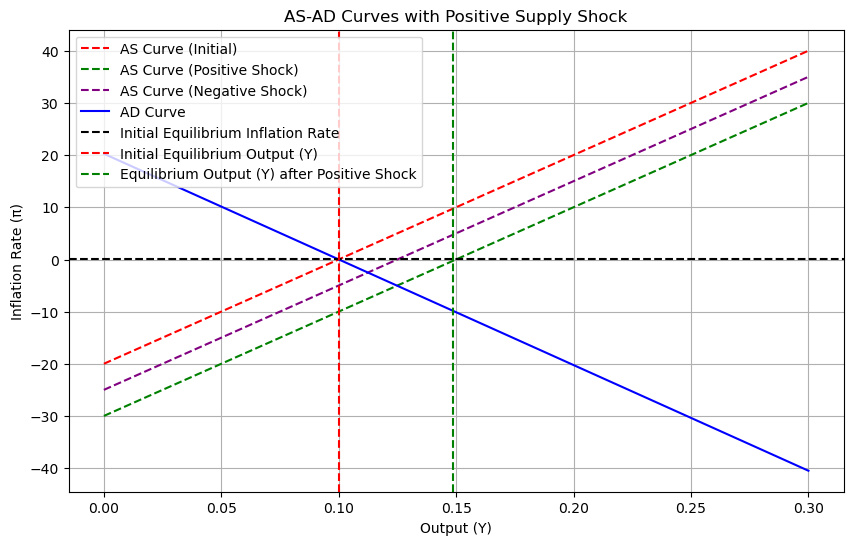

In [7]:

# Plotting the curves
s_t_newer = -5



as_values_newer = pi + gamma * (output_range - y_bar) + s_t_newer


plt.figure(figsize=(10, 6))
plt.plot(output_range, as_values_initial, label='AS Curve (Initial)', color='red', linestyle='--')
plt.plot(output_range, as_values_positive, label='AS Curve (Positive Shock)', color='green', linestyle='--')
plt.plot(output_range, as_values_newer, label='AS Curve (Negative Shock)', color='purple', linestyle='--')
plt.plot(output_range, ad_values_initial, label='AD Curve', color='blue')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('AS-AD Curves with Positive Supply Shock')
plt.axhline(y=pi, color='black', linestyle='--', label='Initial Equilibrium Inflation Rate')
plt.axvline(x=output_range[np.argmin(np.abs(as_values_initial - pi))], color='red', linestyle='--', label='Initial Equilibrium Output (Y)')
plt.axvline(x=output_range[np.argmin(np.abs(as_values_positive - pi))], color='green', linestyle='--', label='Equilibrium Output (Y) after Positive Shock')
plt.legend()
plt.grid(True)
plt.show()

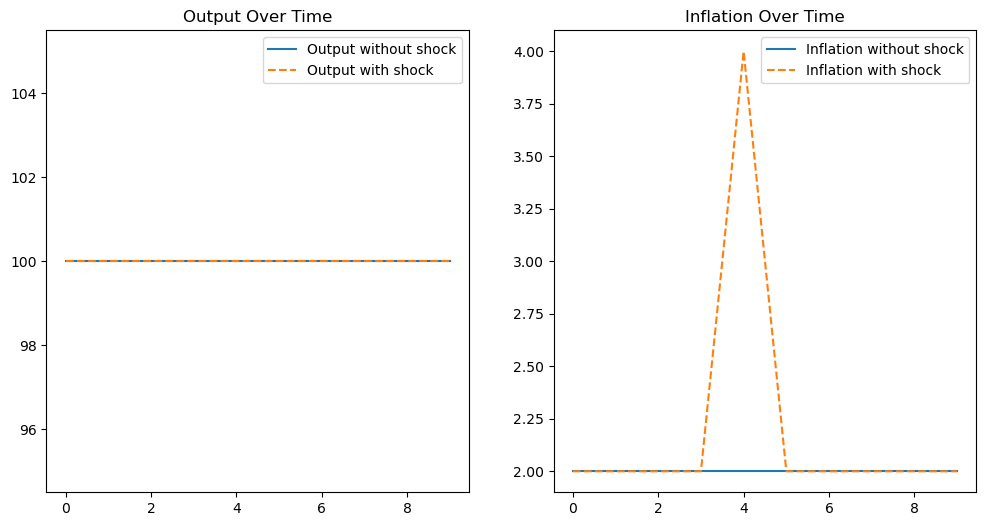

In [8]:
# Basic parameters
alpha1 = 0.5  # response to government spending
alpha2 = 0.5  # response to interest rates
alpha3 = 0.2  # response to taxes
h = 0.5       # responsiveness of nominal interest rate to output gap
b = 0.1       # responsiveness of nominal interest rate to inflation gap
gamma = 0.3   # responsiveness of inflation rate to output gap
bar_y = 100   # natural level of output
bar_g = 20    # standard government spending
bar_tau = 10  # standard tax level
v_t = 0       # stochastic term for IS curve
pi_star = 2   # target inflation rate
s_t = 0       # supply shock term, modified to simulate supply shocks

# AD and AS functions
def AD(pi, z_t):
    alpha = (alpha2 * h) / (1 + alpha2 * b)
    return bar_y + alpha * (pi_star - pi) + z_t

def AS(y, pi_t_minus_1):
    return pi_t_minus_1 + gamma * (y - bar_y) + s_t

# Time series for simulation
years = 10
output = np.empty(years)
inflation = np.empty(years)
output[0] = bar_y
inflation[0] = pi_star

# Simulate the model
for t in range(1, years):
    # Calculate z_t
    z_t = (alpha1 * (bar_g - bar_g) + alpha3 * (bar_tau - bar_tau) + v_t - alpha2 * 0) / (1 + alpha2 * b)
    
    # Update output and inflation based on AD and AS
    output[t] = AD(inflation[t-1], z_t)
    inflation[t] = AS(output[t], inflation[t-1])

# Supply shock: increase s_t in year 5
s_t = 2  # Simulates a positive supply shock
output_with_shock = np.empty(years)
inflation_with_shock = np.empty(years)
output_with_shock[0] = bar_y
inflation_with_shock[0] = pi_star

for t in range(1, years):
    # Update output and inflation with shock in year 5
    if t == 4:
        output_with_shock[t] = AD(inflation_with_shock[t-1], z_t)
        inflation_with_shock[t] = AS(output_with_shock[t], inflation_with_shock[t-1])
    else:
        output_with_shock[t] = output[t]
        inflation_with_shock[t] = inflation[t]

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(output, label='Output without shock')
plt.plot(output_with_shock, label='Output with shock', linestyle='--')
plt.title('Output Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(inflation, label='Inflation without shock')
plt.plot(inflation_with_shock, label='Inflation with shock', linestyle='--')
plt.title('Inflation Over Time')
plt.legend()

plt.show()

In [9]:
# Plot AS-AD model
# Define basic model functions
def AS(y, pi_previous, s_t, gamma=0.3):
    return pi_previous + gamma * (y - bar_y) + s_t

def AD(y, alpha=0.1, pi_star=2):
    return pi_star - alpha * (y - bar_y)

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 